In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Aim is to predict the marks of students of the test data

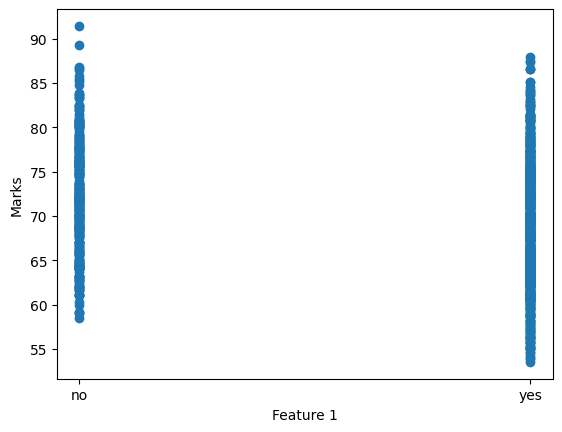

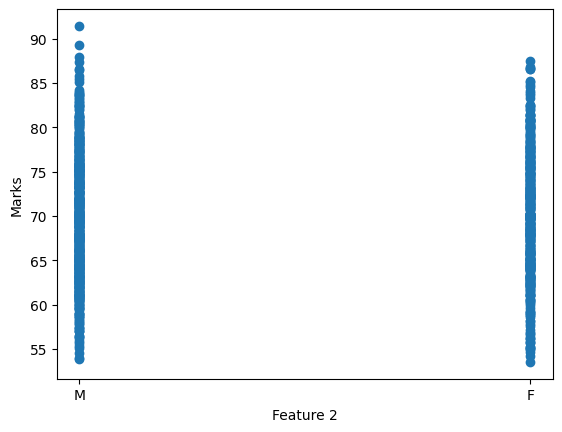

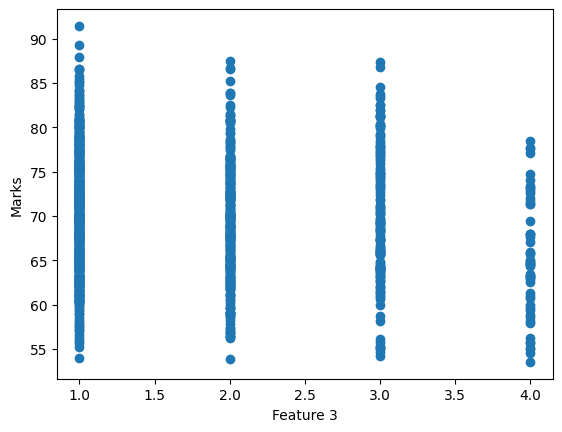

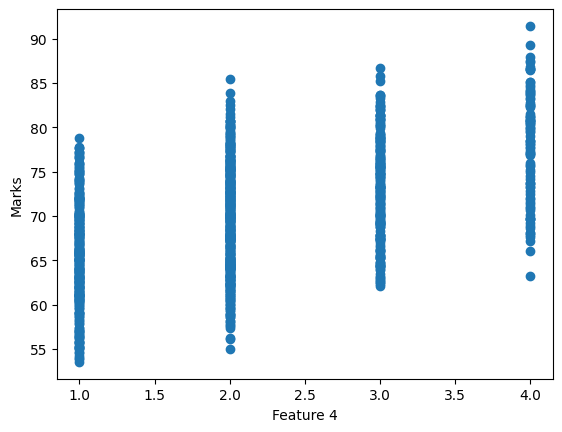

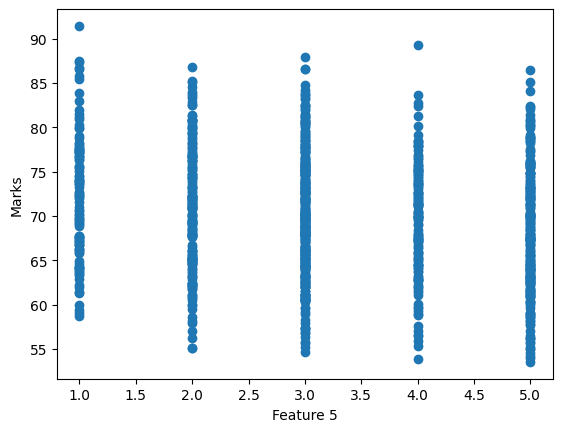

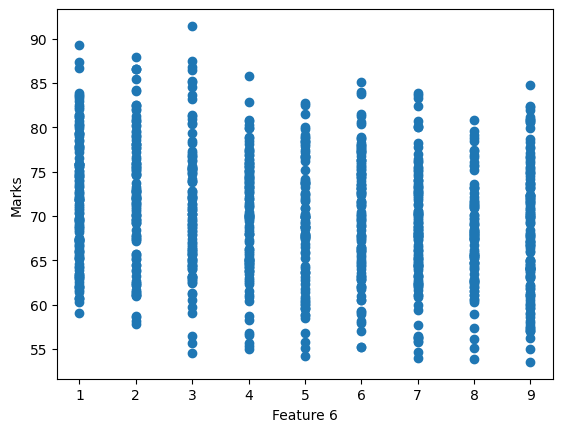

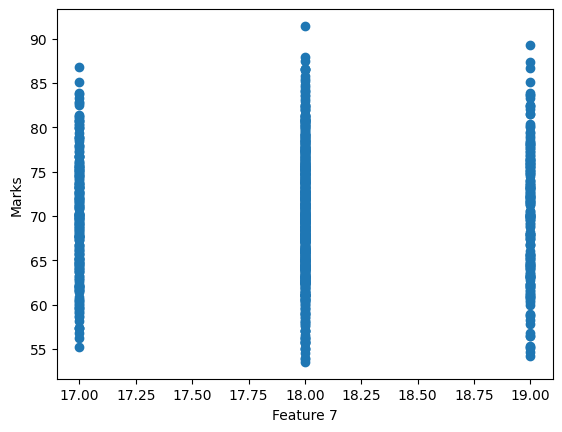

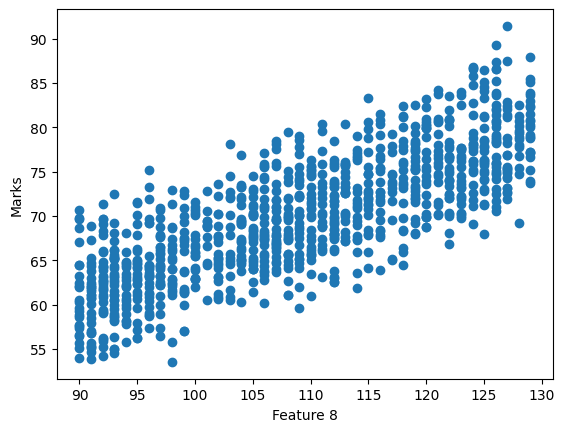

In [15]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Plotting y_train with different features
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Marks')
    plt.show()
    
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    le = LabelEncoder()
    for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            x_train[:, i] = le.fit_transform(x_train[:, i])
    return x_train.astype(float)

x_train = feature_changing(x_train)

In [16]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    # Your code here
  # ---------

    return x_train,x_std,x_mean

In [17]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    m = len(y_train)
    predictions = x_train.dot(w) + b
    loss = (1/(2*m)) * np.sum((predictions - y_train) ** 2)
    # return cost
  # ---------

    return loss

In [18]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, epochs=1000):
    m = len(y_train)
    for i in range(epochs):
        predictions = x_train.dot(w) + b
        error = predictions - y_train
        w_gradient = (1/m) * x_train.T.dot(error)
        b_gradient = (1/m) * np.sum(error)
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
    return w, b

In [19]:
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train, y_train, w, b)) > 0.00001:
    old_cost = cost(x_train, y_train, w, b)
    w, b = gradient_descent(x_train, y_train, w, b, learning_rate=0.01, epochs=1)

x_predict = pd.read_excel('Test data.xlsx').iloc[:, :8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean) / x_std
ans = pd.read_excel('Test data.xlsx').iloc[:, 8].to_numpy()

y_predict = np.dot(x_predict, w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:  # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy * 100 / 200.0, 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
